# Multi-Layer Perceptron

In [80]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [81]:
# load dataset
df=sns.load_dataset('tips')

In [82]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [83]:
categorical_columns=['sex','smoker','day','time']

In [84]:
# encode the categorical variables
for i in categorical_columns:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [85]:
# split the data into X and y features
X=df.drop('tip',axis=1)
y=df['tip']


In [86]:
# train test split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [87]:
# scale the data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [93]:
# building the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [94]:
# compile the model
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])


In [95]:
# training the model
history=model.fit(X_train,y_train,batch_size=32,verbose=1,epochs=100,validation_data=(X_test, y_test))

Epoch 1/100
7/7 [==============================] - 7s 204ms/step - loss: 11.3584 - mae: 3.0211 - val_loss: 7.1274 - val_mae: 2.3772
Epoch 2/100
7/7 [==============================] - 0s 43ms/step - loss: 9.7247 - mae: 2.7414 - val_loss: 5.8690 - val_mae: 2.0986
Epoch 3/100
7/7 [==============================] - 0s 43ms/step - loss: 8.2068 - mae: 2.4597 - val_loss: 4.7280 - val_mae: 1.8170
Epoch 4/100
7/7 [==============================] - 0s 45ms/step - loss: 6.8295 - mae: 2.1666 - val_loss: 3.6922 - val_mae: 1.5306
Epoch 5/100
7/7 [==============================] - 0s 42ms/step - loss: 5.4870 - mae: 1.8655 - val_loss: 2.7999 - val_mae: 1.2952
Epoch 6/100
7/7 [==============================] - 0s 41ms/step - loss: 4.2086 - mae: 1.5752 - val_loss: 2.1289 - val_mae: 1.1163
Epoch 7/100
7/7 [==============================] - 0s 52ms/step - loss: 3.1566 - mae: 1.3391 - val_loss: 1.7504 - val_mae: 1.0468
Epoch 8/100
7/7 [==============================] - 0s 42ms/step - loss: 2.3557 - mae: 1.

In [96]:
# evaluate the model
loss=model.evaluate(X_test,y_test,verbose=0)
print('Mean_squared_error:', loss[0])

Mean_squared_error: 1.1628767251968384


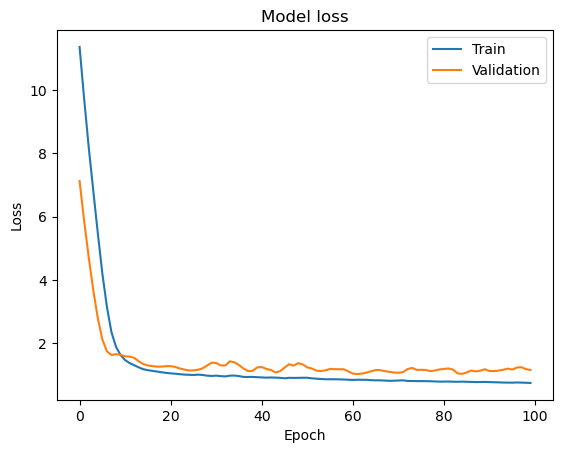

In [97]:
# Plotting the training and testing loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

---
# Early stopping of epochs

Epoch 1/100
7/7 [==============================] - 7s 172ms/step - loss: 11.0514 - val_loss: 7.0577
Epoch 2/100
7/7 [==============================] - 0s 35ms/step - loss: 9.3806 - val_loss: 5.7288
Epoch 3/100
7/7 [==============================] - 0s 44ms/step - loss: 7.7878 - val_loss: 4.4943
Epoch 4/100
7/7 [==============================] - 0s 37ms/step - loss: 6.2599 - val_loss: 3.3449
Epoch 5/100
7/7 [==============================] - 0s 34ms/step - loss: 4.8279 - val_loss: 2.3775
Epoch 6/100
7/7 [==============================] - 0s 38ms/step - loss: 3.5264 - val_loss: 1.6663
Epoch 7/100
7/7 [==============================] - 0s 40ms/step - loss: 2.4678 - val_loss: 1.2974
Epoch 8/100
7/7 [==============================] - 0s 34ms/step - loss: 1.8205 - val_loss: 1.2520
Epoch 9/100
7/7 [==============================] - 0s 35ms/step - loss: 1.4820 - val_loss: 1.4009
Epoch 10/100
7/7 [==============================] - 0s 34ms/step - loss: 1.3961 - val_loss: 1.5294
Epoch 11/100
7/7 

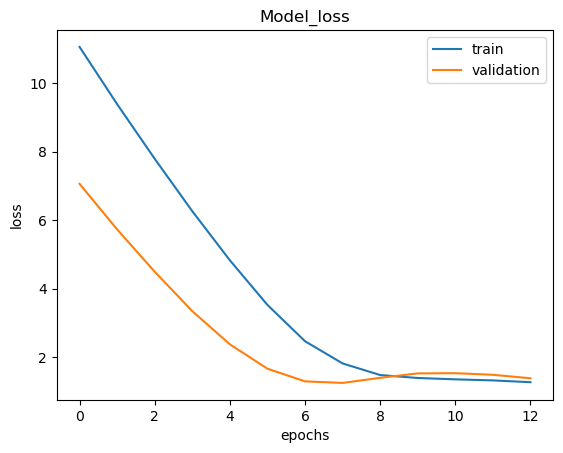

In [99]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='upper right')
plt.show()